# Screw dislocation

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from psm.segments import Segments
from psm.build import lattice_segment
from psm import plotutils

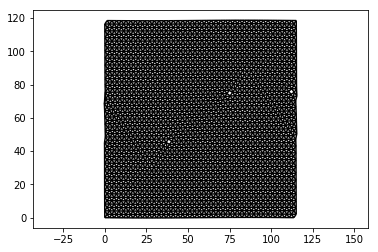

In [2]:
points = np.load('data/al_disloc.npy')

segments = Segments(points)
segments.build_graph(.2)

segments.show_edges();

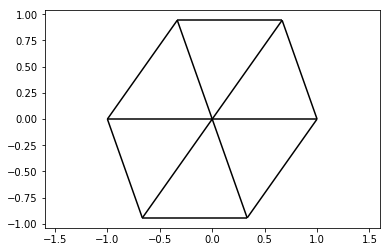

In [3]:
a = [1, 0]
b = [1/3., -2*np.sqrt(2)/3.]

templates = lattice_segment(a, b, max_depth=2)

templates.show();

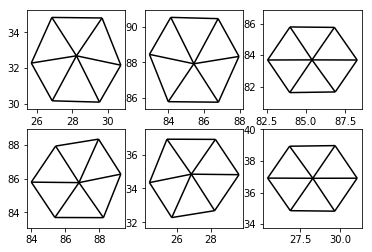

In [4]:
segments.traversals(max_depth=2)
segments.show(6, nrows=2);

In [5]:
rmsd = segments.register(templates, transform='similarity', pivot='front')

 [||||||||||||||||||||] 2431/2431 registrations


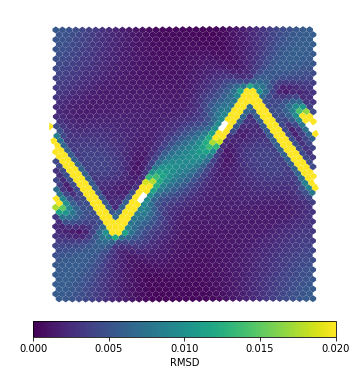

In [6]:
best_match, best_rmsd = segments.best_matches()

fig,ax = plt.subplots(1,1,figsize=(12,6))

_, p = plotutils.voronoi_plot(segments, ax, c=best_rmsd, cmap='viridis', vmin=0, vmax=.02)
plotutils.add_colorbar(ax, label='RMSD', cmap='viridis', vmin=0, vmax=.02)

ax.axis('equal')
ax.axis('off');

In [7]:
strain, rotation = segments.calc_strain(adjust_zero='median', rmsd_max=.05)

planar = np.trace(strain, axis1=1, axis2=2) / 2

valid = np.isnan(rotation) == 0
rotation[valid] = rotation[valid] % (np.pi/3)

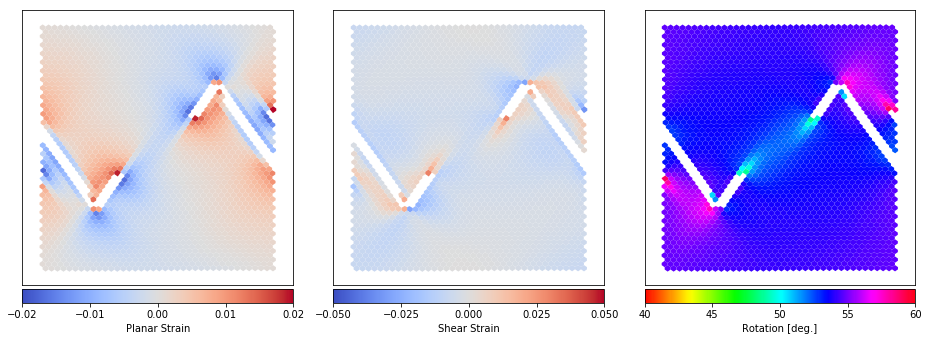

In [8]:
fig,axes = plt.subplots(1,3,figsize=(13,6))

plotutils.voronoi_plot(segments, axes[0], c=planar, cmap='coolwarm', vmin=-.02, vmax=.02)
plotutils.add_colorbar(axes[0], label='Planar Strain', cmap='coolwarm', vmin=-.02, vmax=.02)

plotutils.voronoi_plot(segments, axes[1], c=strain[:,0,1], cmap='coolwarm', vmin=-.05, vmax=.05)
plotutils.add_colorbar(axes[1], label='Shear Strain', cmap='coolwarm', vmin=-.05, vmax=.05)

plotutils.voronoi_plot(segments, axes[2], c=rotation / np.pi * 180, cmap='hsv', vmin=40, vmax=60)
plotutils.add_colorbar(axes[2], label='Rotation [deg.]', cmap='hsv', vmin=40, vmax=60)

for ax in axes:
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()